<a href="https://colab.research.google.com/github/jpescobarn/AnaliticaDatos/blob/master/Base_de_datos_FIFA_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Base de Datos FIFA 20
## Juan Pablo Escobar Naranjo 

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1fnbnmY6u7SP7pxUruQh7dfS_bhjKqkDj"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2020-10-23 15:56:08--  https://docs.google.com/uc?export=download&confirm=&id=1fnbnmY6u7SP7pxUruQh7dfS_bhjKqkDj
Resolving docs.google.com (docs.google.com)... 173.194.69.100, 173.194.69.113, 173.194.69.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.69.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-6k-docs.googleusercontent.com/docs/securesc/qjm29jta5h8jkrssgtkoncpm2cn9od50/vj1i9p19ni61i00agd5f06cto7n3h0ho/1603468500000/00689712531917028238/15638162993638795346Z/1fnbnmY6u7SP7pxUruQh7dfS_bhjKqkDj?e=download [following]
--2020-10-23 15:56:08--  https://doc-04-6k-docs.googleusercontent.com/docs/securesc/qjm29jta5h8jkrssgtkoncpm2cn9od50/vj1i9p19ni61i00agd5f06cto7n3h0ho/1603468500000/00689712531917028238/15638162993638795346Z/1fnbnmY6u7SP7pxUruQh7dfS_bhjKqkDj?e=download
Resolving doc-04-6k-docs.googleusercontent.com (doc-04-6k-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to

In [ ]:
#Paso 1: Lectura
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#from funciones_fifa import dummy_fifa, pre_exploratorio, save_fig, code_euro

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline



import pandas as pd
%matplotlib inline
csv_path = 'FIFA_20.csv'
Xdata = pd.read_csv(csv_path)

col_drop = ['jersey_number', 'name']
Xdata.drop(columns = col_drop, inplace = True)


Xdata.head()

,overall,nationality,club,position,preferred_foot,work_rate,wage_eur,international_reputation,weak_foot,skill_moves,age,height_cm,weight_kg,pace,shooting,passing,dribbling,defending,physic,finishing,fk_accuracy,acceleration,agility,stamina,penalties,composure,standing_tackle,sliding_tackle
0,94,Argentina,FC Barcelona,Midfielder,Left,Medium,565000,5,4,4,32,170,72,87,92,92,96,39,66,95,94,91,93,75,75,96,37,26
1,93,Portugal,Juventus,Midfielder,Right,High,405000,5,4,5,34,187,83,90,93,82,89,35,78,94,76,89,87,85,85,95,32,24
2,92,Brazil,Paris Saint-Germain,Midfielder,Right,High,290000,5,5,5,27,175,68,91,85,87,95,32,58,87,87,94,96,81,90,94,26,29
3,91,Belgium,Real Madrid,Midfielder,Right,High,470000,4,4,4,28,175,74,91,83,86,94,35,66,84,79,94,95,84,88,91,27,22
4,91,Belgium,Manchester City,Midfielder,Right,High,370000,4,5,4,28,181,70,76,86,92,86,61,78,82,83,77,78,89,79,91,58,51


In [ ]:
Xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16042 entries, 0 to 16041
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   overall                   16042 non-null  int64 
 1   nationality               16042 non-null  object
 2   club                      16042 non-null  object
 3   position                  16042 non-null  object
 4   preferred_foot            16042 non-null  object
 5   work_rate                 16042 non-null  object
 6   wage_eur                  16042 non-null  int64 
 7   international_reputation  16042 non-null  int64 
 8   weak_foot                 16042 non-null  int64 
 9   skill_moves               16042 non-null  int64 
 10  age                       16042 non-null  int64 
 11  height_cm                 16042 non-null  int64 
 12  weight_kg                 16042 non-null  int64 
 13  pace                      16042 non-null  int64 
 14  shooting              

In [ ]:
#Paso 2: Particion entrenamiento y validacion
# Tamaño Xtrain 70%, Tamaño Xtest 30%
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(Xdata,test_size=0.3)
col_sal = "overall"  #Salida condición del jugador en general
ytrain = Xtrain[col_sal]
ytest = Xtest[col_sal]
Xtrain.drop(columns=col_sal,inplace=True)
Xtest.drop(columns=col_sal,inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")   #Completa con la moda, en los espacios vacíos
ytrain = imputer.fit_transform(pd.DataFrame(ytrain)) #Ajústese y transformese en el conjunto de entrenamiento 
ytrain = ytrain.reshape(-1)    #Vector Columna 
#Los ajustes sólo se hacen en el conjunto de entrenamiento (fit)

ytest = imputer.transform(pd.DataFrame(ytest))
ytest = ytest.reshape(-1)

print(ytrain.shape, ytest.shape)

(11229,) (4813,)


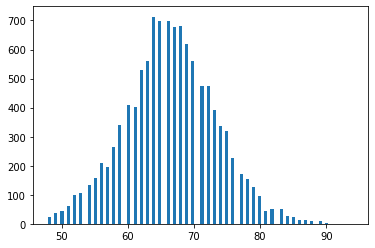

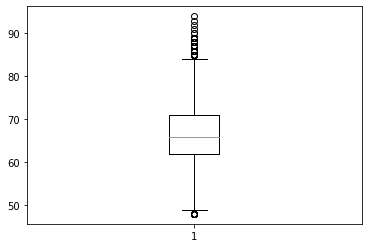

In [ ]:
plt.hist(ytrain,bins = 100)
plt.show()

plt.boxplot(ytrain)
plt.show()

In [ ]:
#definir columnas tipo string  para codificar moneda, estadistica fifa y categoricas
col_euro = ['wage_eur'];
col_stats = ['international_reputation','weak_foot','skill_moves','age','height_cm','weight_kg','pace','shooting','passing',
             'dribbling','defending','physic','finishing','fk_accuracy','acceleration','agility','stamina',
             'penalties','composure','standing_tackle','sliding_tackle'];

cat = ['nationality','club','position','preferred_foot',
        'work_rate']
items = [] 
for i in cat:
    items += [list(Xdata[i].value_counts().index)]
cat_usr = dict(zip(cat, items))

In [ ]:
a = Xtrain.columns[np.sum(Xtrain.isna())> 0]
Xtrain.isna() #El Xtrain no contiene espacios vacíos 
print(np.sum(Xtrain.isna()))
Xtrain.isna() 

nationality                 0
club                        0
position                    0
preferred_foot              0
work_rate                   0
wage_eur                    0
international_reputation    0
weak_foot                   0
skill_moves                 0
age                         0
height_cm                   0
weight_kg                   0
pace                        0
shooting                    0
passing                     0
dribbling                   0
defending                   0
physic                      0
finishing                   0
fk_accuracy                 0
acceleration                0
agility                     0
stamina                     0
penalties                   0
composure                   0
standing_tackle             0
sliding_tackle              0
dtype: int64


,nationality,club,position,preferred_foot,work_rate,wage_eur,international_reputation,weak_foot,skill_moves,age,height_cm,weight_kg,pace,shooting,passing,dribbling,defending,physic,finishing,fk_accuracy,acceleration,agility,stamina,penalties,composure,standing_tackle,sliding_tackle
2689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12553,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13059,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14527,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12755,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8800,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8413,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2355,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##Crear Clase de Preproceso

In [ ]:
#%% dummy transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder


class dummy_fifa20(BaseEstimator,TransformerMixin):
    #inicializacion de clase y varaibles
    def __init__(self, col_euro,col_stats, cat_usr): #constructor clase
        self.col_euro = col_euro #lista atributos tipo moneda
        self.col_stats = col_stats #lista atributos tipo estadistica
        self.cat_usr = cat_usr #lista de atributos categoricos

    def fit(self, X, *_):
       Xi = X.copy()
       cat = [] #codificar variables categoricas con ordinal encoder
       for i in self.cat_usr.keys():
            cat = cat + [[*self.cat_usr.get(i)]]
       self.col_cat_usr = OrdinalEncoder(categories=cat)
       #self.col_cat_usr = OnehotEncoder(categories=cat, sparse=false)
       Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.fit_transform(Xi[[*self.cat_usr.keys()]])

       return self 
      
    def transform(self, X, *_):#funcion transformador -> Datos nuevos
        Xi = X.copy()

        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.transform(Xi[[*self.cat_usr.keys()]])
        #Xi[self.col_cat]= self.cod.transform(Xi[self.col_cat])
        return Xi
    
    def fit_transform(self,X,*_):
        self.fit(X)
        return self.transform(X)

        

In [ ]:
dummy = dummy_fifa20(col_euro=col_euro,col_stats=col_stats,cat_usr = cat_usr)
Xtrain_pre = dummy.fit_transform(Xtrain) #Dumy para entrenamiento 

In [ ]:
Xtrain_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11229 entries, 2689 to 5117
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nationality               11229 non-null  float64
 1   club                      11229 non-null  float64
 2   position                  11229 non-null  float64
 3   preferred_foot            11229 non-null  float64
 4   work_rate                 11229 non-null  float64
 5   wage_eur                  11229 non-null  int64  
 6   international_reputation  11229 non-null  int64  
 7   weak_foot                 11229 non-null  int64  
 8   skill_moves               11229 non-null  int64  
 9   age                       11229 non-null  int64  
 10  height_cm                 11229 non-null  int64  
 11  weight_kg                 11229 non-null  int64  
 12  pace                      11229 non-null  int64  
 13  shooting                  11229 non-null  int64  
 14  pass

In [ ]:
Xtest_pre=dummy.transform(Xtest)  #Dummy para datos de test
                                  # A datos nuevos no se les hace fit, para que no haga el ajuste
                                  # Se transforma o se hace predicción (.transform)

In [ ]:
Xtest_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 5745 to 3490
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nationality               4813 non-null   float64
 1   club                      4813 non-null   float64
 2   position                  4813 non-null   float64
 3   preferred_foot            4813 non-null   float64
 4   work_rate                 4813 non-null   float64
 5   wage_eur                  4813 non-null   int64  
 6   international_reputation  4813 non-null   int64  
 7   weak_foot                 4813 non-null   int64  
 8   skill_moves               4813 non-null   int64  
 9   age                       4813 non-null   int64  
 10  height_cm                 4813 non-null   int64  
 11  weight_kg                 4813 non-null   int64  
 12  pace                      4813 non-null   int64  
 13  shooting                  4813 non-null   int64  
 14  passi

In [ ]:
corr_matrix = Xtrain_pre.corr() #Correlación del Xtrain preprocesado 
corr_matrix.style.background_gradient(cmap='coolwarm')

,nationality,club,position,preferred_foot,work_rate,wage_eur,international_reputation,weak_foot,skill_moves,age,height_cm,weight_kg,pace,shooting,passing,dribbling,defending,physic,finishing,fk_accuracy,acceleration,agility,stamina,penalties,composure,standing_tackle,sliding_tackle
nationality,1.000000,0.077313,-0.003997,-0.014683,0.032484,-0.027357,-0.016410,0.015763,0.035486,0.018460,0.028326,0.042835,0.050261,0.036098,0.001359,0.025006,-0.032241,0.046236,0.031719,0.001099,0.046662,0.007397,0.019153,0.019057,0.023121,-0.028907,-0.033453
club,0.077313,1.000000,0.047479,-0.009861,-0.033600,-0.302577,-0.225054,-0.058508,-0.165582,0.040307,-0.014169,-0.012970,-0.050188,-0.136641,-0.192507,-0.198585,-0.107832,-0.076624,-0.112177,-0.090912,-0.051492,-0.062508,-0.053403,-0.094059,-0.211127,-0.094197,-0.079058
position,-0.003997,0.047479,1.000000,0.010910,0.085552,0.071862,0.084443,0.010924,-0.032007,0.209375,0.185126,0.210054,-0.025768,0.035979,-0.048000,-0.024580,0.038423,0.274705,0.033977,-0.044568,-0.052431,-0.096730,0.124838,0.061721,0.145368,0.003974,-0.001996
preferred_foot,-0.014683,-0.009861,0.010910,1.000000,-0.009270,0.000605,-0.010053,-0.121429,0.042884,-0.014232,-0.051804,-0.054780,0.063549,-0.027307,0.077873,0.058204,0.045725,-0.057209,-0.040410,0.101361,0.062795,0.050093,0.002726,-0.023506,-0.007873,0.054965,0.067023
work_rate,0.032484,-0.033600,0.085552,-0.009270,1.000000,0.060670,0.043988,0.014031,0.087815,0.107400,0.005945,0.023118,0.070135,0.063837,0.044415,0.042476,0.029592,0.110167,0.052512,0.035615,0.066709,0.041261,0.119122,0.052527,0.108924,0.016133,0.009773
wage_eur,-0.027357,-0.302577,0.071862,0.000605,0.060670,1.000000,0.653625,0.155463,0.310488,0.161381,0.027613,0.077597,0.115440,0.303841,0.401879,0.368603,0.155467,0.215171,0.255102,0.269250,0.108589,0.147565,0.214899,0.261954,0.467444,0.123972,0.100846
international_reputation,-0.016410,-0.225054,0.084443,-0.010053,0.043988,0.653625,1.000000,0.135735,0.265813,0.268249,0.036344,0.089977,0.016419,0.277565,0.358112,0.302146,0.128629,0.170343,0.223769,0.271798,0.017299,0.088577,0.099336,0.282453,0.430742,0.096453,0.076260
weak_foot,0.015763,-0.058508,0.010924,-0.121429,0.014031,0.155463,0.135735,1.000000,0.275937,0.108586,-0.101405,-0.057470,0.153458,0.325084,0.287621,0.315249,-0.106722,0.006152,0.308058,0.260618,0.158181,0.225642,0.095195,0.263227,0.253705,-0.119885,-0.137384
skill_moves,0.035486,-0.165582,-0.032007,0.042884,0.087815,0.310488,0.265813,0.275937,1.000000,0.126164,-0.294333,-0.210788,0.428312,0.627276,0.612978,0.717093,-0.218986,-0.078751,0.593474,0.537306,0.440234,0.537496,0.199459,0.494841,0.489644,-0.221787,-0.249358
age,0.018460,0.040307,0.209375,-0.014232,0.107400,0.161381,0.268249,0.108586,0.126164,1.000000,0.059601,0.215588,-0.202236,0.238264,0.329996,0.155876,0.260232,0.434152,0.158518,0.303907,-0.201756,-0.019880,0.244088,0.254772,0.461608,0.202553,0.175703


<function matplotlib.pyplot.show>

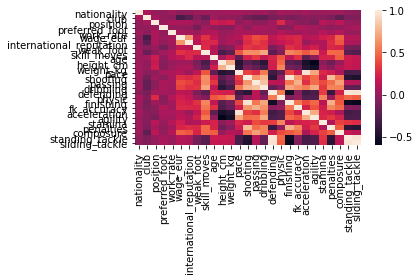

In [ ]:
import seaborn as sns 
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
plt.tight_layout()
plt.show

(27, 27) (11229, 11229)
(27,) (27, 27)


<function matplotlib.pyplot.show>

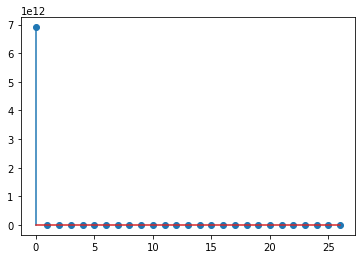

In [ ]:
Xp = np.array(Xtrain_pre)
Xtrain_pre.shape
C = Xp.T.dot(Xp)
K = Xp.dot(Xp.T)
print(C.shape, K.shape)
valC, vecC = np.linalg.eig(C)
print(valC.shape, vecC.shape)


plt.stem(valC)
plt.show 

(50,) (11229, 50)


<function matplotlib.pyplot.show>

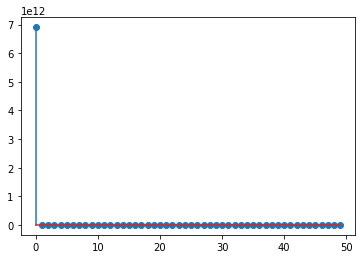

In [ ]:
from scipy.sparse.linalg import eigs 

valK, vecK= eigs(K, k=50)
print(valK.shape, vecK.shape)

plt.stem(valK)
plt.show 

In [ ]:
Xtrain_pre2 = Xtrain_pre.copy()
Xtrain_pre2['Overall'] = ytrain
corr_matrix = abs(Xtrain_pre2.corr()) #Correlación salida 
corr_matrix['Overall'].sort_values(ascending= False)



Overall                     1.000000
composure                   0.811934
passing                     0.682811
dribbling                   0.597232
wage_eur                    0.576317
physic                      0.514165
shooting                    0.500485
skill_moves                 0.491155
international_reputation    0.480948
stamina                     0.473501
age                         0.465046
fk_accuracy                 0.453968
penalties                   0.412209
finishing                   0.398440
defending                   0.329761
club                        0.296305
standing_tackle             0.261777
weak_foot                   0.233887
agility                     0.228982
sliding_tackle              0.220094
position                    0.213186
weight_kg                   0.177132
pace                        0.151581
work_rate                   0.138769
acceleration                0.135634
height_cm                   0.062210
nationality                 0.023599
p

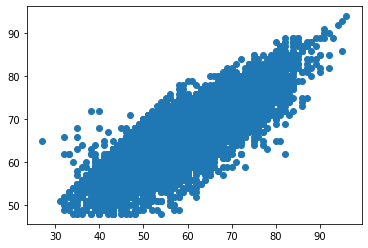

In [ ]:

plt.scatter(Xtrain_pre['composure'],ytrain)   #Composure tiene la mayor correlación con la salida 
                                              # Siguen una tendencia más o menos lineal, aún teniendo mucha 
                                              # dispersión 

                            

##Modelo de Regresión 

In [ ]:
from sklearn.pipeline import Pipeline              #Se hace el ejemplo con la Regresión Lineal 
from sklearn.linear_model import LinearRegression 

steps = [('preproceso',dummy_fifa20(col_euro=col_euro,col_stats=col_stats,cat_usr = cat_usr)),
         ('regresion', LinearRegression())]

metodo_full = Pipeline(steps = steps) 
metodo_full 

metodo_full.fit(Xtrain, ytrain)  #Entrena todos los pasos 

Pipeline(memory=None,
         steps=[('preproceso',
                 dummy_fifa20(cat_usr={'club': ['1. FC Union Berlin',
                                                'FC Barcelona',
                                                'West Ham United',
                                                '1. FSV Mainz 05',
                                                'FC Augsburg', 'Sampdoria',
                                                'Atlético Madrid',
                                                'Hellas Verona',
                                                'Wolverhampton Wanderers',
                                                'Hertha BSC',
                                                'Borussia Mönchengladbach',
                                                'Paris Saint-Germain',
                                                'FC Nantes', 'Leicester City',
                                                'Manchester United',
                                       

In [ ]:
ytest_e = metodo_full.predict(Xtest)
ytest_e

array([67.40268169, 54.59363565, 65.12264446, ..., 58.5123522 ,
       65.38964772, 68.58731142])

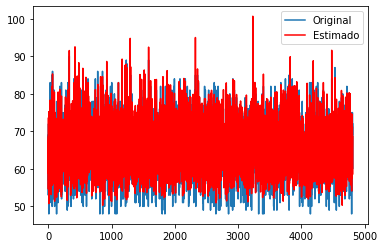

In [ ]:
plt.plot(ytest, label = 'Original')
plt.plot(ytest_e, 'r', label = 'Estimado')
plt.legend()

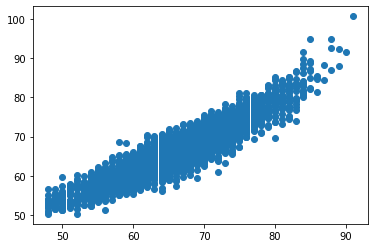

In [ ]:
plt.scatter(ytest,ytest_e)

# Predicción variable de interés desde datos preprocesados

In [ ]:
print(Xtrain_pre.var(axis=0) )          #Al calcular mediana y varianza de los datos, observamos que la diferencia  
print(Xtrain_pre.mean(axis=0))          # de los valores es demasiado alta.

nationality                 4.181829e+02
club                        3.554624e+04
position                    3.168286e-01
preferred_foot              1.877725e-01
work_rate                   3.550967e-01
wage_eur                    5.139597e+08
international_reputation    1.486552e-01
weak_foot                   4.110184e-01
skill_moves                 3.981231e-01
age                         2.040481e+01
height_cm                   4.179051e+01
weight_kg                   4.470002e+01
pace                        1.283675e+02
shooting                    1.977973e+02
passing                     1.076449e+02
dribbling                   1.057714e+02
defending                   2.683041e+02
physic                      9.539900e+01
finishing                   2.690128e+02
fk_accuracy                 2.259391e+02
acceleration                1.396200e+02
agility                     1.517376e+02
stamina                     1.290764e+02
penalties                   1.559982e+02
composure       

In [ ]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler         #Se estandariza para que los rangos de los valores  
sca = StandardScaler()                                   #sean comparables. Se hace que cada atributo esté centrado
Xtrain_pre_z = sca.fit_transform(Xtrain_pre)             # en 0 y tenga varianza 1

In [ ]:
print(Xtrain_pre_z.var(axis=0) )              # Con los datos estandarizados, se observa efectivamente la varianza igual 1
print(Xtrain_pre_z.mean(axis=0))              # Y la mediana prácticamente  0

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]
[-2.02487911e-17  9.42834336e-17 -1.03775054e-16  4.49270053e-17
  7.27690931e-17  3.79664833e-18 -5.94808239e-17 -1.39210439e-17
 -4.96728157e-17 -4.04975822e-17 -1.81986010e-15  3.68274888e-16
 -5.97655725e-16  1.39210439e-17  3.40749188e-16 -1.08837252e-16
  7.71985161e-17  6.55871000e-16  8.32098760e-17 -6.96052195e-17
 -1.58826455e-16  2.13877856e-16  2.75573392e-16 -4.30286811e-17
 -2.27482513e-16 -6.32774722e-19  3.67009339e-17]


In [ ]:
red = PCA()
zz = red.fit_transform(Xtrain_pre_z)   #Permite reducir la dimesión para visualizar (2D)


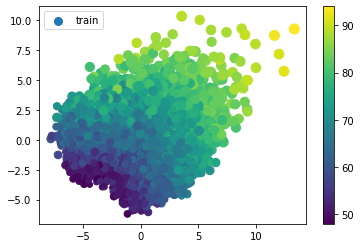

In [ ]:
plt.scatter(zz[:,0],zz[:,1],c=ytrain,s = 100*Xtrain_pre['composure']/(Xtrain_pre['composure'].max()),label='train')  
plt.colorbar()   
plt.legend()                      #Para que quede de 0 a 100,*100 y /máx 
plt.show()                        # Proyectar datos de entrenamiento


In [ ]:
# Proceso con test
Xtest_pre = dummy.transform(Xtest) #-> Dummy preprocesa los datos,
                                   # en este punto todo el data debe estar completo y preprocesado

In [ ]:
Xtest_pre_z = sca.transform(Xtest_pre)  #Estandarización 
zztest = red.transform(Xtest_pre_z)    #Permite reducir la dimesión para visualizar (2D)

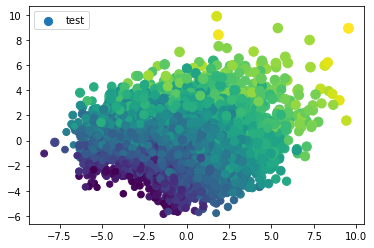

In [ ]:
plt.scatter(zztest[:,0],zztest[:,1],c=ytest,s=100*Xtest_pre['composure']/Xtest_pre['composure'].max(),label='test')
plt.legend()
plt.show()

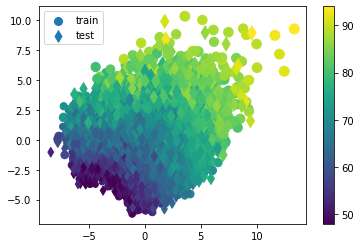

In [ ]:
plt.scatter(zz[:,0],zz[:,1],c=ytrain,s = 100*Xtrain_pre['composure']/(Xtrain_pre['composure'].max()),label='train')
plt.colorbar()
plt.scatter(zztest[:,0],zztest[:,1],c=ytest,s=100*Xtest_pre['composure']/Xtest_pre['composure'].max(),marker='d',label='test')
plt.legend()
plt.show()
# Comparación entre Test y Train 

## Definir Modelos de Predicción 

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.kernel_ridge import KernelRidge

steps = [
         [('scaler', StandardScaler()), 
          ('reg', LinearRegression())],
         
         [('scaler',StandardScaler()),        #1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1
          ('reg',ElasticNet())],              # + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
         
         [('scaler', StandardScaler()), 
          ('reg',  KernelRidge(kernel='rbf'))], 
         
         [('scaler', StandardScaler()),     #(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
          ('reg',Lasso())],
         
         [('scaler', StandardScaler()),     #||y - Xw||^2_2 + alpha * ||w||^2_2
          ('reg', Ridge())]
         ]        

#parametros a buscar por busqueda por grilla

parameters =[ 
             {
                 'reg__fit_intercept':[True, False]             
             },
             {
                 'reg__alpha': [0, 1e-3, 1e-1,1], 
                 'reg__l1_ratio':[0,0.5,0.75,1 ],
                 'reg__fit_intercept':[True, False]
             },
             {
                 'reg__alpha': [0, 1e-3, 1e-1,1],
                 'reg__gamma': [0, 0.02, 0.2, 0.5] 
             },
             {
                 'reg__alpha': [0, 1e-3, 1e-1,1],
                 'reg__fit_intercept': [True, False]
             },
             {
                 'reg__alpha': [0, 1e-3, 1e-1,1],
                 'reg__fit_intercept': [True, False]
             }
              ]

label_model = ['Nor+RegLin','Nor+ElasticNet', 'Nor+KernelRidge', 'Nor+Lasso', 'Nor+Ridge']

In [ ]:
steps #Lista con los modelos 


[[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('reg',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))],
 [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('reg', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
              max_iter=1000, normalize=False, positive=False, precompute=False,
              random_state=None, selection='cyclic', tol=0.0001, warm_start=False))],
 [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('reg', KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='rbf',
               kernel_params=None))],
 [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('reg', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
         normalize=False, positive=False, precompute=False, random_state=None,
         selection='cyclic', tol=0.0001, warm_start=False))],
 [('scaler', StandardScaler(copy=True, wi

In [ ]:
parameters #Diccionario de parámetros 

[{'reg__fit_intercept': [True, False]},
 {'reg__alpha': [0, 0.001, 0.1, 1],
  'reg__fit_intercept': [True, False],
  'reg__l1_ratio': [0, 0.5, 0.75, 1]},
 {'reg__alpha': [0, 0.001, 0.1, 1], 'reg__gamma': [0, 0.02, 0.2, 0.5]},
 {'reg__alpha': [0, 0.001, 0.1, 1], 'reg__fit_intercept': [True, False]},
 {'reg__alpha': [0, 0.001, 0.1, 1], 'reg__fit_intercept': [True, False]}]

In [ ]:
#Crear carpeta con Resultados 
import os
pathpre = 'datospre'

try:
  os.mkdir(pathpre)
except:
  print("Carpeta results ya existe")


Carpeta results ya existe


In [ ]:
#valildacion cruzada anidada
from joblib import dump, load
from sklearn.metrics import mean_absolute_error as msa 
Niter = 5 #numero particiones outter loop nested cross-validation
msev =np.zeros((Niter,len(steps)))#arreglo para guardar acierto/error
Nmod = len(steps) #numero de modelos a probar
best_estimators = Niter*[None]#mejor metodo por iteracion
###clave del funcionamiento
best_hyperpar = Niter*[None]#mejor metodo por iteracion 


for j in range(Niter): #outter loop 
      #print('it %d/%d'%(j+1,Niter))
      #particiono datos outter loop
      X_trainj, X_testj, y_trainj, y_testj = train_test_split(Xtrain_pre,ytrain,test_size=0.3) # xtrain 60, xtest 26
      list_est = [] #lista lazo interno para guardar mejor estimador por modelo para iteracion j
      list_hyper = [] #lista lazo interno para guardar mejores hyperparametros por modelo para iteracion j
      for r in range(Nmod): #recorro todos los posibles modelos a probar en iteracion j del outter loop
          grid_search = GridSearchCV(Pipeline(steps[r],memory=pathpre), parameters[r],cv=5,verbose=5,scoring='neg_mean_absolute_error',n_jobs=-1) #cv inner loop
          #xtrain gridsearchcv xtrain split en 12 / cv, 60/5 = 12, xtrain 48 datos validar 12
          # cv = N -> leave one out N <30
          #generar mejor modelo
          grid_search.fit(X_trainj,y_trainj)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_testj)
          #guardar mejor modelo
          list_est.append(grid_search.best_estimator_)
          list_hyper.append(grid_search.best_params_)
          #guardar acierto
          msev[j,r] = msa(y_testj,y_pred)
          print('it %d/%d-Modelo %d/%d'%(j+1,Niter,r+1,len(steps)))
          print('best hyper', grid_search.best_params_)
          print('msa:',msev[j,r])
          
      best_estimators[j] = list_est #guardar mejores modelos 
      best_hyperpar[j] = list_hyper #mejores hyperparametros
          
          
      savedata = {
          'acc':msev,
          'best_models':best_estimators,
          'best_parameters':best_hyperpar,
            } 
      dump(savedata,'FIFA20.joblib')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/5-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 2.1822453730483233
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.7s finished


it 1/5-Modelo 2/5
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': True, 'reg__l1_ratio': 0}
msa: 2.1821614489451493
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 13.1min finished


it 1/5-Modelo 3/5
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.02}
msa: 1.178319936188944
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.2s finished


it 1/5-Modelo 4/5
best hyper {'reg__alpha': 0, 'reg__fit_intercept': True}
msa: 2.1822453730483207
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.5s finished


it 1/5-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': True}
msa: 2.1822147488724393
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/5-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 2.203675422354064
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.4s finished


it 2/5-Modelo 2/5
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': True, 'reg__l1_ratio': 0}
msa: 2.203759530466827
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 13.4min finished


it 2/5-Modelo 3/5
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.02}
msa: 1.1894767631149918
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.3s finished


it 2/5-Modelo 4/5
best hyper {'reg__alpha': 0, 'reg__fit_intercept': True}
msa: 2.203675422354064
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.5s finished


it 2/5-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': True}
msa: 2.2036755953412004
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


it 3/5-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 2.1476975121912725
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   14.3s finished


it 3/5-Modelo 2/5
best hyper {'reg__alpha': 0, 'reg__fit_intercept': True, 'reg__l1_ratio': 0}
msa: 2.14769751219127
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 13.3min finished


it 3/5-Modelo 3/5
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.02}
msa: 1.171348816436983
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.4s finished


it 3/5-Modelo 4/5
best hyper {'reg__alpha': 0, 'reg__fit_intercept': True}
msa: 2.14769751219127
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.5s finished


it 3/5-Modelo 5/5
best hyper {'reg__alpha': 0, 'reg__fit_intercept': True}
msa: 2.147697512191272
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/5-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 2.1892742328976045
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.7s finished


it 4/5-Modelo 2/5
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': True, 'reg__l1_ratio': 0}
msa: 2.1897597713904524
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 13.4min finished


it 4/5-Modelo 3/5
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.02}
msa: 1.168310947645331
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/5-Modelo 4/5
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': True}
msa: 2.189339019776754
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.5s finished


it 4/5-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': True}
msa: 2.189330083689437
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


it 5/5-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 2.1620506979882177
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.6s finished


it 5/5-Modelo 2/5
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': True, 'reg__l1_ratio': 0}
msa: 2.1626274073681246
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 13.6min finished


it 5/5-Modelo 3/5
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.02}
msa: 1.1635401002189396
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/5-Modelo 4/5
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': True}
msa: 2.1624309256955065
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.5s finished


it 5/5-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': True}
msa: 2.1621160869137723


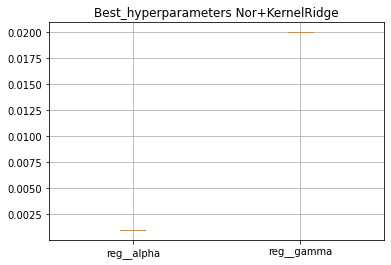

Modes=  [0.001 0.02 ]


In [74]:
from scipy.stats import mode
from datetime import date

r =2  #hyperparameters model 1
nh = len(best_hyperpar[0][r])
hyperpar_r = np.zeros((Niter,nh)) 
for i in range(Niter):
  for j in range(nh):
    hyperpar_r[i,j] = best_hyperpar[i][r].get(list(best_hyperpar[i][r].keys())[j])
    
    
#revisar numero entero para realizar casting
aa = list(best_hyperpar[0][r].keys())
c = -1
for i in range(len(aa)):
    if aa[i].find('n_neighbors') > -1:
      c = i

plt.boxplot(hyperpar_r)
plt.xticks(ticks=np.arange(nh)+1,labels=list(best_hyperpar[0][r].keys()))
plt.title('Best_hyperparameters '+label_model[r])
plt.grid()
plt.show()

mode_hyper = mode(hyperpar_r,axis=0)[0][0]
print("Modes= ", mode_hyper)

# Modelo Definitivo 

Con los mejores hiperparámetros se entrena sobre Xtrain completo el modelo final. Al consultar las gráficas arrojadas por los modelos y los cálculos del error, se aprecia que el modelo que más se adapta a esta base de datos es el modelo de **KernelRidge**

In [75]:
#r = 0 # Reg Lineal
#r = 1 # Eslastic Net
r = 2 # KernelRidge
#r = 3 # Lasso
#r = 4 # Ridge
steps_final_0 = [('scaler',StandardScaler()),
                ('reg',LinearRegression(fit_intercept= True))]  

steps_final_1 = [('scaler',StandardScaler()),        
                ('reg',ElasticNet( alpha=0.01,fit_intercept = True, l1_ratio=0))] 

steps_final_2 = [('scaler', StandardScaler()), 
                ('reg',  KernelRidge(kernel='rbf', alpha=0.001, gamma=0.02))]
         
steps_final_3 =  [('scaler', StandardScaler()),     
                 ('reg',Lasso(alpha=0, fit_intercept= True))]     

steps_final_4=   [('scaler', StandardScaler()),     
                 ('reg', Ridge(alpha=1, fit_intercept= True))]  

modelo_final = Pipeline(steps_final_2)
modelo_final.fit(Xtrain_pre,ytrain)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=0.02,
                             kernel='rbf', kernel_params=None))],
         verbose=False)

#Caso Real - Evaluación de datos nuevos

In [76]:
ytest_e = modelo_final.predict(dummy.transform(Xtest)) #simular casos nuevos

In [77]:
print('MAE_test=', msa(ytest,ytest_e))

MAE_test= 1.1055432971139971


In [78]:
pathpre = 'resultados'

try:
  os.mkdir(pathpre)
except:
  print("Carpeta results ya existe")

Carpeta results ya existe


In [79]:
import shutil
from joblib import dump, load
from datetime import date, datetime
from google.colab import files

modelo_final = {'modelo':modelo_final,
          'pasos':label_model[1],
          'mae_test':msa(ytest,ytest_e),
            } 

dump(modelo_final,'resultados/modelo_final.joblib')
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__modelo'
shutil.make_archive(namefile, 'zip', 'resultados')
files.download(namefile+'.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>